In [1]:
from si import *

Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [3]:
fs = {"Default (2-3)":r.TFile("./data/ADT_run2c/results_ADTscan_June9_2_3.root"),
      "3-4":r.TFile("./data/ADT_run2c/results_ADTscan_June9_3_4.root"),
      "4-5":r.TFile("./data/ADT_run2c/results_ADTscan_June9_4_5.root"),
      "6-8":r.TFile("./data/ADT_run2c/results_ADTscan_June9_6_8.root")
     }

adt_params_low_ct = [2,3,4,6]

fs["3-4"].cd("clusters")
fs["3-4"].ls()

TFile**		./data/ADT_run2c/results_ADTscan_June9_3_4.root	
 TFile*		./data/ADT_run2c/results_ADTscan_June9_3_4.root	
  TDirectoryFile*		clusters	clusters (CaloHitPositions) folder
   KEY: TH3F	randclusters1;1	time randomized clusters
   KEY: TH3F	randxtals1;1	time randomized clusters
   KEY: TH3F	randclusters2;1	time randomized clusters
   KEY: TH3F	randxtals2;1	time randomized clusters
   KEY: TH3F	randclusters3;1	time randomized clusters
   KEY: TH3F	randxtals3;1	time randomized clusters
   KEY: TH3F	randclusters4;1	time randomized clusters
   KEY: TH3F	randxtals4;1	time randomized clusters
   KEY: TH3F	randclusters5;1	time randomized clusters
   KEY: TH3F	randxtals5;1	time randomized clusters
   KEY: TH3F	randclusters6;1	time randomized clusters
   KEY: TH3F	randxtals6;1	time randomized clusters
   KEY: TH3F	randclusters7;1	time randomized clusters
   KEY: TH3F	randxtals7;1	time randomized clusters
   KEY: TH3F	randclusters8;1	time randomized clusters
   KEY: TH3F	randxtals8;1	time r

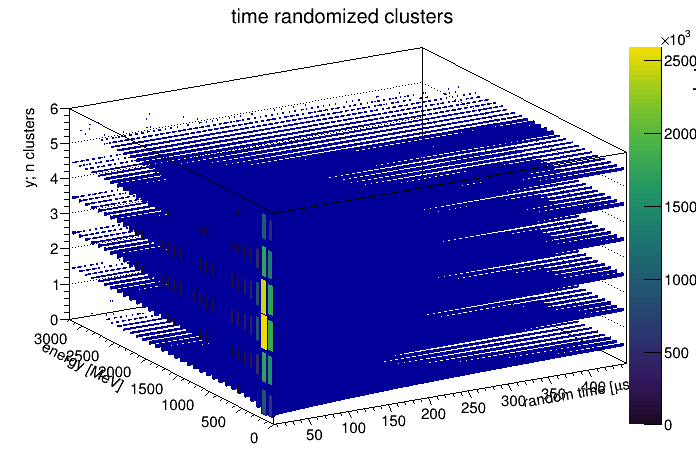

In [23]:
h = fs["3-4"].Get("clusters/randxtals6").Clone()
c = r.TCanvas()
h.Draw("lego2z")
c.Draw()

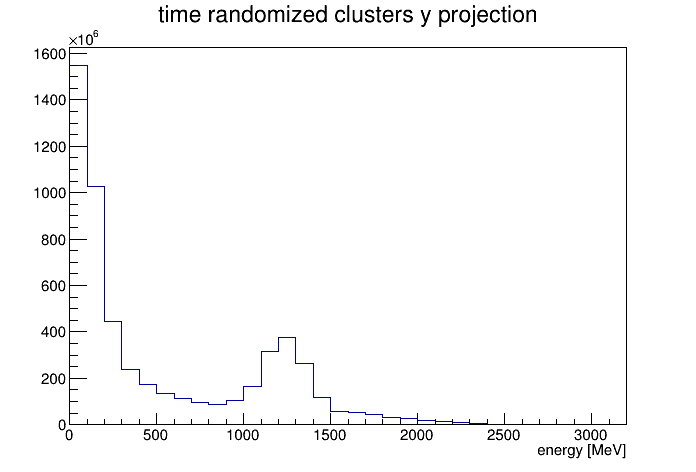

In [24]:
c = r.TCanvas()
h.Project3D("y").Draw()
c.Draw()

In [4]:
def fitfunc(choice, fitrange, params=None):
    tlow, thigh = fitrange
    if(choice is 0):
        func = r.TF1("func","[0] + [1] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
        func.SetParNames("C", "A", "#tau", "m")
        if(params is None):
            paramVec = [1,10,1,-0.0001,10]
        else:
            paramVec = params
        for i,xi in enumerate(paramVec):
            func.SetParameter(i,xi)
        return (func,paramVec)
    elif(choice is 1):
        func = r.TF1("func","pol1",tlow,thigh)
        func.SetParNames("C", "m")
        if(params is None):
            params = [1,-0.00001]
        for i,xi in enumerate(params):
            func.SetParameter(i,xi)
        return (func, params)
    else:
        print("Invalid choice")
        return -1

In [27]:
datasetfits = {}
datasetslopes = {}
datasetslopeErrs = {}
for name in fs:
    print("Starting", name)
    f = fs[name]
    allFitResults = {}
    slopes = []
    slopeErrs = []
    for calo in range(1,25):
        print("    Calo ", calo)
        #randclusters = f.Get("verticalPosition/randclusters"+str(calo)).Clone()
        randclusters = f.Get("clusters/randxtals"+str(calo)).Clone()
        randclusters.Rebin3D(1,1,1)
        randclusters.GetYaxis().SetRange(randclusters.GetYaxis().FindBin(0),randclusters.GetYaxis().FindBin(500))
        widthDict = getWidths(randclusters.Project3D("zx"), scale=25, offset=3)

        tlow = 30
        thigh = 150

        func,paramVec = fitfunc(1, [tlow,thigh]) 

        fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
        allFitResults["calo"+str(calo)] = fitresult
        slopes.append(fitresult.pars[1])
        slopeErrs.append(fitresult.parErrs[1])
        #break
    datasetfits[name] = allFitResults
    datasetslopes[name] = slopes
    datasetslopeErrs[name] = slopeErrs

Starting Default (2-3)
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting 3-4
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting 4-5
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting 6-8
    Calo  1
    Calo  2
    C

In [28]:
print(datasetslopes)

{'Default (2-3)': [-0.0001774627909711027, -0.00026660621878605667, -0.00020083056464840257, -0.0002248944399288402, -0.00014444606604663429, -0.00011550052104080809, -0.00010745477628267012, -0.0001383327839533836, -4.862572935251333e-05, -0.00012952117950992145, -0.00016323113962798784, -0.00021176132072501838, -0.00015290375143599608, -0.00019113371342546496, -0.0001913442291369116, -0.00019808234415348875, -0.0002507214807397974, -0.0002168978302178583, -0.00017875775267770953, -0.00020253434983128746, -0.00017330776103113168, -0.00019355040329126737, -0.00023484518000447695, -0.0002519757256329307], '3-4': [-0.0001774627909711027, -0.00026909980303582704, -0.00020477306544039136, -0.00022353120114900548, -0.00014388302792715286, -0.00011156276110385926, -0.00010745477628267012, -0.0001383327839533836, -4.862572935251333e-05, -0.00012952117950992145, -0.00016105817625702203, -0.00020176672891451087, -0.00015418336713598325, -0.00019773587810376604, -0.0001770360174638694, -0.000196

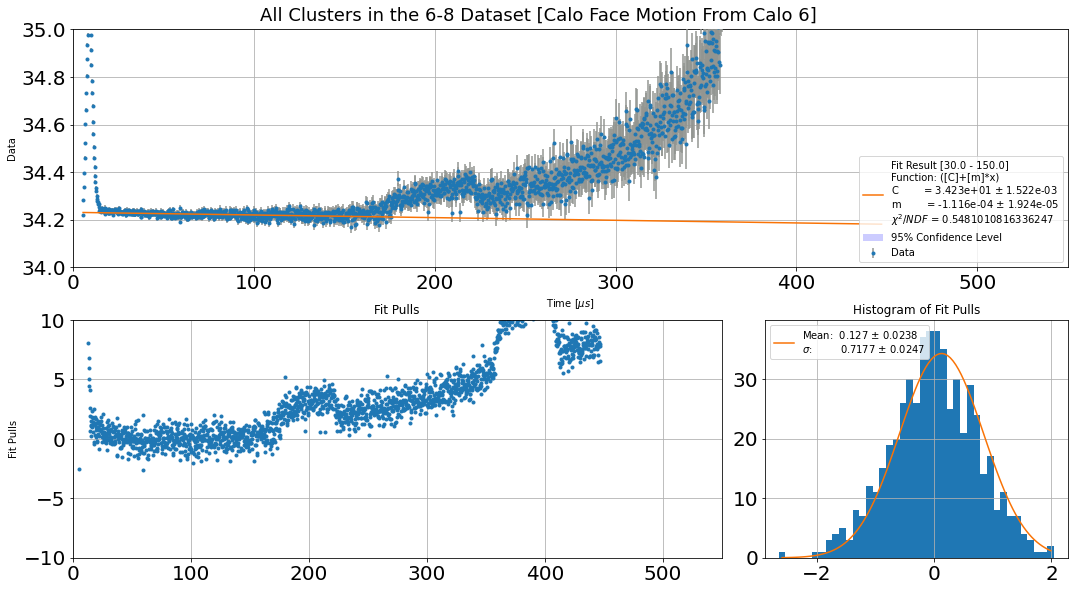

In [29]:
calo=6
fig,ax = datasetfits["3-4"]['calo'+str(calo)].draw("All Clusters in the "+name+" Dataset [Calo Face Motion From Calo "+str(calo)+"]", 
                        yrange=[None, [-10,10]], fmti=".")
ax[0].set_ylim(34,35)
#ax[0].set_xlim(0,50)
for i in range(2):
    ax[i].set_xlim(0,550)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

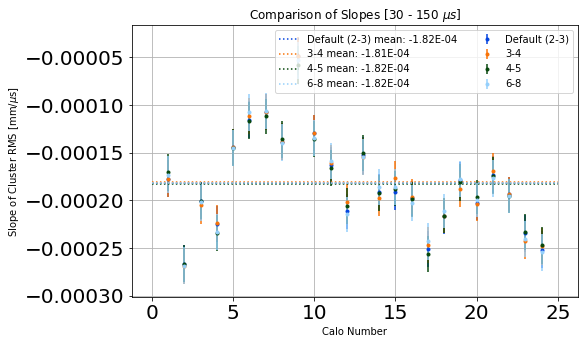

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ['xkcd:blue', 'xkcd:orange', 'xkcd:forest green', 'xkcd:light blue']
for i, name in enumerate(datasetslopes):
    slopes = datasetslopes[name]
    color=colors[i]
    plt.errorbar([x for x in range(1,25)], slopes, yerr=datasetslopeErrs[name], fmt=".",label=name, color=color)
    mean = np.mean(slopes)
    plt.plot([0,25], [mean,mean], ":", label=name+" mean: "+str(format(mean, "2.2E")), color=color)
#plt.errorbar([x for x in range(1,25)], slopes_eg, yerr=slopeErrs_eg, fmt=".",label="EndGame")
plt.grid()
plt.title(r"Comparison of Slopes ["+str(tlow)+" - "+str(thigh)+r" $\mu s$]")
plt.xlabel("Calo Number")
plt.ylabel(r"Slope of Cluster RMS [mm/$\mu$s]")
plt.legend(ncol=2)
# fit.f.SetParameters(0.0001,0.00001, 0.25,0)
# fit.drawFitResult(ax)
# plt.ylim(0,0.00045)
plt.show()